In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:


df= pd.get_dummies(df,columns=["Gender"])

In [5]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,0,15674932,Okwudilichukwu,668,France,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,True
1,1,15749177,Okwudiliolisa,627,France,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,True
2,2,15694510,Hsueh,678,France,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,True
3,3,15741417,Kao,581,France,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,True
4,4,15766172,Chiemenam,716,Spain,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True


In [6]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Gender_Female      0
Gender_Male        0
dtype: int64

(array([8.9675e+04, 1.7800e+02, 2.5180e+03, 1.1880e+04, 2.7820e+04,
        2.4228e+04, 7.5040e+03, 1.1110e+03, 1.0900e+02, 1.1000e+01]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

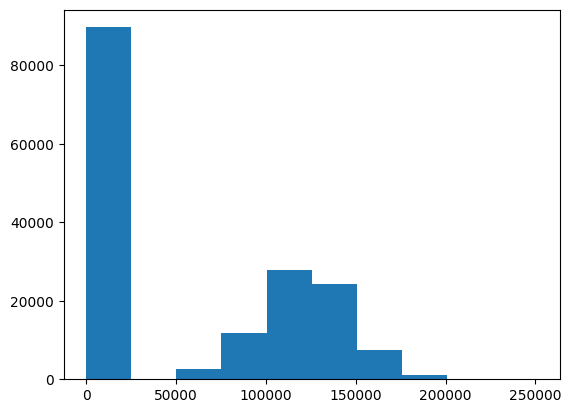

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['Balance'], bins= 10)

Text(0.5, 1.0, 'Histogram')

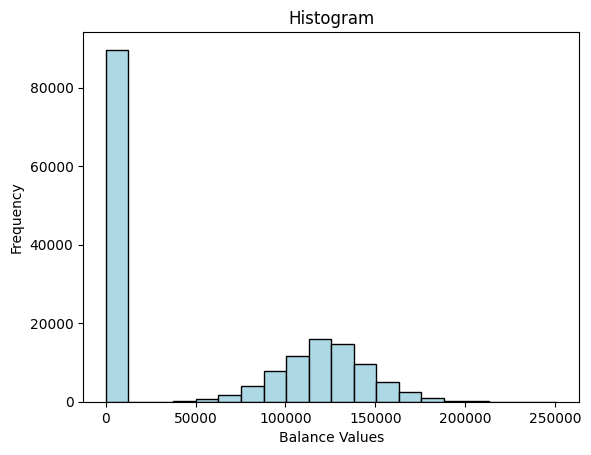

In [8]:
plt.hist(df['Balance'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Balance Values')
plt.ylabel('Frequency')
plt.title('Histogram')

In [9]:
df['Balance'].value_counts()

 
 

Balance
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: count, Length: 30075, dtype: int64

Text(0.5, 1.0, 'Histogram')

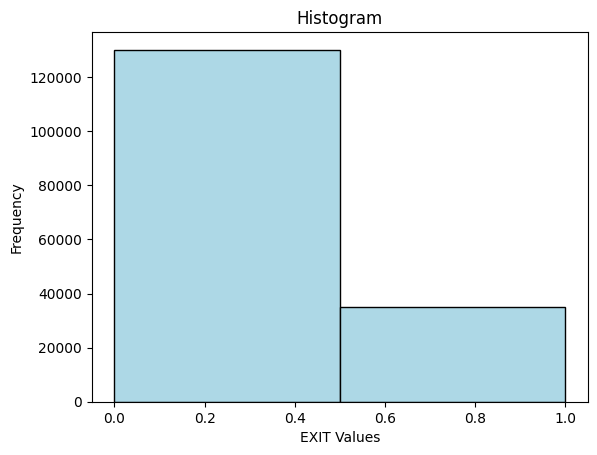

In [10]:
## lot of people have a balance of 0, 89648 to be precise
plt.hist(df['Exited'], bins=2, color='lightblue', edgecolor='black')
plt.xlabel('EXIT Values')
plt.ylabel('Frequency')
plt.title('Histogram')

(array([   56.,   871.,  3805., 10733., 27375., 32446., 39840., 31385.,
        11890.,  6633.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

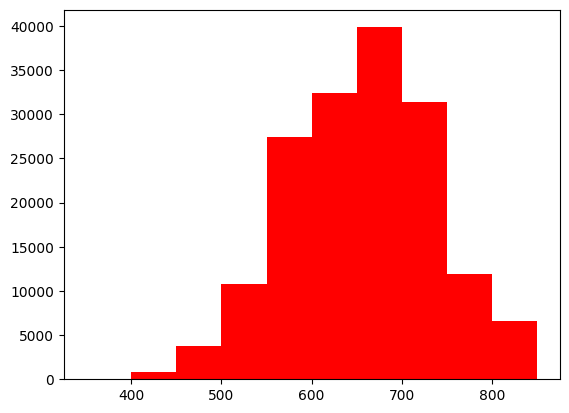

In [11]:
plt.hist(df['CreditScore'],bins =10, color='red')


In [12]:
sample= pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")

In [13]:
from sklearn.ensemble import RandomForestClassifier
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Geography','Gender_Female', 'Gender_Male', 'HasCrCard', 'IsActiveMember']

In [14]:
X =  pd.get_dummies(df[features], dtype=int)
y = df['Exited']
 
rfc = RandomForestClassifier()

# Train the model on the training set
rfc.fit(X, y )

RandomForestClassifier()

In [15]:
test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
test= pd.get_dummies(test,columns=["Gender"])

In [16]:
x_test = pd.get_dummies(test[features], dtype=int)
# y = test['Exited']/

predictions = rfc.predict(x_test)

In [17]:
output = pd.DataFrame({'id': test.id, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [18]:
sample = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")

In [19]:
output.head()

,id,Survived
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0


In [20]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Gender_Female', 'Gender_Male'],
      dtype='object')